# 課題5: 判別分析法
判別分析法を用いて画像二値化せよ。

判別分析法は、画像の濃度を2つのクラスに分けるときに、もっとも良く分離できる閾値を探すアルゴリズムである。クラス内での濃度の分散（クラス内分散）が小さく、クラス同士の濃度の分散（クラス間分散）が大きければ、良く分離できていると判断することができる。

式を用いて手順を表すと、次のようになる。

全画素の濃度の平均値を $\mu_T$、濃度 $t$ で分けたときのクラス $i \: (i=1,2)$ の分散を $\sigma^2_i$、平均値を $\mu_i$、画素数を $n_i$ とする。

クラス内分散は、各クラスの分散の加重平均で表す。

$$
\sigma^2_w = \frac{n_1 \sigma^2_1 + n_2 \sigma^2_2}{n_1 + n_2}
$$

クラス間分散は、各クラスの平均について、全体の平均からの二乗差を求め、それらの加重平均で表す。

$$
\sigma^2_B = \frac{n_1 (\mu_1 - \mu_T)^2 + n_2 (\mu_2 - \mu_T)^2}{n_1 + n_2}
$$

このとき、クラス内分散とクラス間分散の比 ${\sigma^2_B} / {\sigma^2_w}$ が最大となる $t$ を探す。

そこで、 $t=1,2,\cdots,255$ と変化させながら ${\sigma^2_B} / {\sigma^2_w}$ が最大となる $t$ を求めることにする。原画像として、課題2で使用した原画像を使用する。原画像を図1に示す。

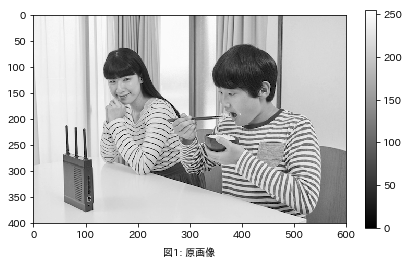

In [1]:
# 環境準備
%run -i prelude.ipy

# 画像を読み込む
original = PIL.Image.open(IMAGE1_PATH)

# グレースケールに変換
original = np.array(original.convert(mode='L'))

# 表示
def imshow(img, vmax, title):
    fig, ax = plt.subplots(figsize=(7, 4))
    m = ax.imshow(img, cmap='gray', vmin=0, vmax=vmax)
    fig.colorbar(m)
    ax.text(0.5, -0.12, title,
            transform=ax.transAxes,
            horizontalalignment='center',
            verticalalignment='top')

imshow(original, 255, '図1: 原画像')

まず、画像を濃度値の配列に変換し、全画素の平均を計算する。

In [2]:
# 濃度値の配列にする
orig_vec = original.ravel()

# 平均
mu_T = orig_vec.mean()
print('全画素の平均:', mu_T)

全画素の平均: 182.68140833333334


閾値を t としたときのクラス内分散とクラス間分散の比を計算する関数 var_ratio を定義する。 var_ratio で行う処理は、先程説明した通りである。

In [3]:
def var_ratio(t):
    # 濃度がt未満の画素をクラス1、t以上の画素をクラス2とする
    c1 = orig_vec[orig_vec < t]
    c2 = orig_vec[orig_vec >= t]
    
    # クラスに含まれる画素数を数える
    n1 = c1.size
    n2 = c2.size
    
    # 該当する画素がない場合は、この後の計算ができないので
    # 最小の値を返して終了
    if n1 == 0 or n2 == 0:
        return -np.inf
    
    # クラスに含まれる画素の濃度の平均を計算する
    mu1 = c1.mean()
    mu2 = c2.mean()
    
    # クラスに含まれる画素の濃度の分散を計算する
    sigma1 = c1.var()
    sigma2 = c2.var()
    
    # クラス内分散を計算する
    sigma_w = (n1 * sigma1 + n2 * sigma2) / (n1 + n2)
    
    # クラス間分散を計算する
    sigma_B = (n1 * ((mu1 - mu_T) ** 2) + n2 * ((mu2 - mu_T) ** 2)) / (n1 + n2)
    
    # 比を求める
    return sigma_B / sigma_w

これを用いて、 t を 1 から 255 まで変化させたときに、比が最大となる t を求める。

In [4]:
# 比の最大値
max_ratio = -np.inf
# 比が最大となる t
argmax_t = 1

for t in range(1, 256):
    r = var_ratio(t)
    
    # 比が史上最大ならば、値を更新
    if r > max_ratio:
        max_ratio = r
        argmax_t = t

print('argmax_t var_ratio =', argmax_t)

argmax_t var_ratio = 155


このようにして、閾値は155とすれば良いことがわかった。課題3で行った方法で、閾値を155として2値化を行った画像を、図2に示す。

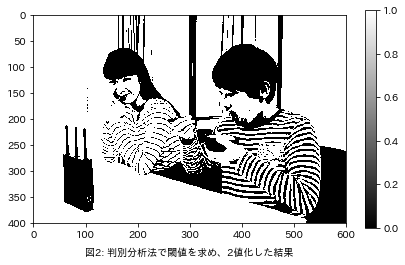

In [5]:
img = original >= argmax_t
imshow(img, 1, '図2: 判別分析法で閾値を求め、2値化した結果')

課題3で、閾値を画像の分析をせず決めた値で2値化した結果に比べて、図2の結果は、図1を人の目で見たときに「ここは濃い」と感じるところが黒く、それ以外が白くなっており、見た目の感覚に近い2値化ができているように感じられる。